# Introduction to NumPy


[Numpy documentation](https://numpy.org/doc/stable/)


NumPy is the most used library for scientific computing in Python. It is optimized and easy-to-use and offers e.g. linear algebra routines and a comprehensive set of mathematical functions.

In [15]:
# imports for this lesson
import time
import numpy as np
import matplotlib.pyplot as plt

## Arrays

An array is a 'grid' of values of the same type. It is indexed by tuples of non-negative indices. Each array has the following attributes:
- `dtype`, data type. If not specified, then the data type of the array is the minimum type required to hold the objects in the sequence. 
- `shape`, shape of the data as a tuple. For example, a $3 \times 4$ matrix has shape $(3,4)$.
- `data`, raw data storage in memory.

### Arrays vs lists

In [16]:
length = 100000000
a = list(range(length))
b = [ 0 ] * length

In [17]:
# square of a list
tic = time.time()
for i in range(len(a)):
  b[i] = a[i]**2
toc = time.time()
print(f"Elapsed time: {toc - tic}")

Elapsed time: 4.990151405334473


In [18]:
# numpy array of the arithmetic sequence of numbers from 0 to length and step 1
a_np = np.arange(length)
b_np = np.zeros(length)

In [19]:
# square of an array: vectorized operation
tic = time.time()
b_np = a_np ** 2
toc = time.time()
print(f"Elapsed time: {toc - tic}")

Elapsed time: 0.12299370765686035


### Creating arrays

In [20]:
# 1-dimensional array of length 3
a = np.array([1,2,3])
# 2-dimensional array of shape (2,3) -> 3x4 matrix
b = np.array([[1,2,3], [4,5,6]])
print(f"a={a}")
print(f"b={b}")

a=[1 2 3]
b=[[1 2 3]
 [4 5 6]]


In [21]:
# 3x4 matrix of zeros
zero = np.zeros((3,4))
zero

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
# be careful with data types :)
print(zero.dtype)
zero = np.zeros((3,4), dtype = np.int64)
print(zero.dtype)

float64
int64


In [23]:
# 2x5 matrix of ones
one = np.ones((2,5))
one

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [24]:
# identity matrix
identity = np.eye(5)
identity

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Basic operations on arrays

In [25]:
# get the shape
print(f"Shape: {one.shape}")
# get the size, i.e. the number of entries
print(f"Size: {one.size}")
# get the number of dimensions: e.g. for a vector is 1, for a matrix 2
print(f"Number of dimensions: {one.ndim}")
# get the data type
print(f"Data type: {one.dtype}")

Shape: (2, 5)
Size: 10
Number of dimensions: 2
Data type: float64


In [26]:
# sum
a = np.array([1,2,3])
b = np.array([4,5,6])
# alternative: np.add
a + b

array([5, 7, 9])

In [27]:
# subtraction
# alternative: np.subtract
a - b

array([-3, -3, -3])

In [28]:
# multiplication (component-wise)
# alternative: np.multiply
a*b

array([ 4, 10, 18])

In [29]:
# division (component-wise)
# alternative: np.divide
a/b

array([0.25, 0.4 , 0.5 ])

In [30]:
# transpose
a = np.array([[1,2,3], [4,5,6]])
print(a)
# more general alternative: np.transpose
a.T

[[1 2 3]
 [4 5 6]]


array([[1, 4],
       [2, 5],
       [3, 6]])

In [31]:
# arithmetic mean of an array (see docs for matrix)
np.mean(b)

5.0

## Linear Algebra with NumPy

NumPy can efficiently handle Linear Algebra computations. Some of the most useful routines are the following.
- `@`: matrix-vector / matrix-matrix product (see online docs for the behavior in the case of two 1-D arrays and other cases). 
- `np.dot`: compute the dot (scalar) product of two arrays (see online docs for the dot product of two matrices).
- `np.linalg.norm`: compute the norm of an array or matrix (see online docs for the definition of such norms).
- `np.linalg.solve`: solve a system of linear equations. 
- `np.linalg.inv`: compute the inverse of a matrix.

For a matrix-matrix multiplication, `np.dot` can be used, but `@` is preferred: see [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot).

In [32]:
# matrix-vector product
M = np.ones((3,2), dtype = np.int64)
a = np.ones(2, dtype = np.int64)
M @ a

array([2, 2, 2])

In [33]:
# matrix-matrix product
M @ M.T

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [39]:
# dot product between two arrays
a = np.array([0,3,4])
b = np.array([4,5,6])
np.dot(a,b)

39

In [40]:
# 2-norm of an array
np.linalg.norm(a)

5.0

In [43]:
# solving a linear system
A = np.array([[1,2],[0,1]])
b = np.array([3,4])
x = np.linalg.solve(A,b)
print(f"The solution of the system Ax = b is: {x}")

The solution of the system Ax = b is: [-5.  4.]


In [42]:
# solution check
A @ x

array([3., 4.])

In [100]:
# inverse of a matrix
A = np.array([[1,2], [0, 1]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 1., -2.],
       [ 0.,  1.]])

In [101]:
# inverse check
A @ A_inv

array([[1., 0.],
       [0., 1.]])

## Examples

### 1. Approximations of $\pi$

#### 1.1 Monte Carlo approximation of $\pi$

To estimate the value of $\pi$ we can proceed as follows. Consider a circle or radius $\frac{1}{2}$ inscribed in a square with edge $1$. The area of the circle is $\frac{\pi}{4}$ and can be estimated generating a large number of randomly placed points within the square and by counting how many of these fall in the enclosing circle. Precisely,
$$\frac{\pi}{4} \approx \frac{n_{\text{in}}}{n},$$
where $n$ is the number of points generated and $n_{\text{in}}$ is the number of points inside the circle.

In [45]:
def MonteCarloPi(num_sample):
    """ Implement the Monte Carlo method to approximate pi.

    Args:
        num_sample: number of (x,y) samples.
    """
    
    # generate random (x,y) samples in [0,1)^2
    random_x = np.random.rand(num_sample)
    random_y = np.random.rand(num_sample)
    # center them in [-1,1)^2
    x = 2*random_x - 1
    y = 2*random_y - 1

    # squared distance from the center
    r = x**2+y**2
    # count the points inside the circle
    num_inside = np.sum(r<=1)
    # get coordinates of inside and outside points for the plot
    x_inside = x[r<=1]
    y_inside = y[r<=1]
    x_outside = x[r>1]
    y_outside = y[r>1]

    # estimate pi and valuate the error percentage w.r.t. the true value
    pi_approx = 4*num_inside / num_sample
    pi_error = round(100*((pi_approx-np.pi)/np.pi),4)

    # PLOT
    
    # coordinates of the vertices of the square (needed for the plot)
    square_x = np.array([1,-1,-1,1,1])
    square_y = np.array([1,1,-1,-1,1])

    # generate vector of angles in degree
    theta_degree = np.arange(361)
    # formula to pass from degree to radiant
    theta_radiant = np.pi*theta_degree/180
    # a cirle needed for the plot
    circle_x = np.cos(theta_radiant)
    circle_y = np.sin(theta_radiant)
    
    # draw
    plt.figure(figsize=(5,5))
    plt.plot(square_x,square_y,color='#000')
    plt.plot(circle_x,circle_y,color='#000')
    plt.scatter(x_inside,y_inside,color='#e41a1c',marker=".")
    plt.scatter(x_outside,y_outside,color='#377eb8',marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # print the estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {pi_approx}\n')
    print(f'This is {pi_error}% off the true value.\n')

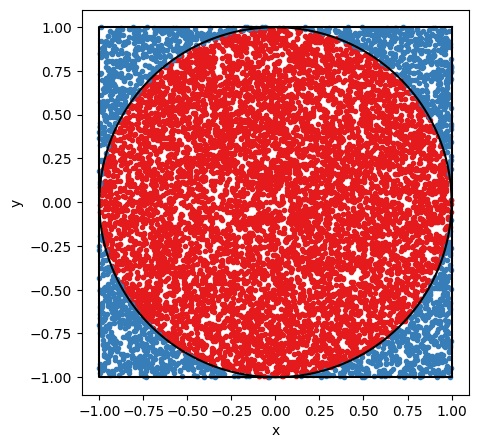


Pi is approximately 3.1572

This is 0.4968% off the true value.



In [50]:
MonteCarloPi(10000)

#### 1.2 Leibniz formula for $\pi$


$$\pi/4 = \arctan(1) = \sum_{k=0}^{+\infty} \frac{(-1)^k}{2k + 1}$$

In [51]:
n = 10000000
k = np.arange(n)
pi_approx = 4*np.sum((-1)**k/(2*k + 1))
print(pi_approx)

3.1415925535897977


### 2. Eigenvalues of a special matrix

In this section we find the eigenvalues and eigenvectors of the matrix $A = \frac{1}{h^2}\text{trid}(1, -2, 1)$, where $h = \frac{1}{N}$ and the matrix has shape $N \times N$.

In [52]:
def build_matrix(N):
    """Build the tridiagonal matrix.

    Args:
        N: size of the matrix.

    Returns:
        the tridiagonal matrix.
    """
    main_diag = -2*np.ones(N-1)
    off_diag = np.ones(N-2)
    derivative_matrix = (np.diag(main_diag) + np.diag(off_diag, k=1)+ np.diag(off_diag, k=-1))
    return derivative_matrix

In [53]:
N = 1000
x = np.linspace(0,1,N+1)
h = x[1]-x[0]
trid_matrix = build_matrix(N)
trid_matrix

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [54]:
A = 1/(h**2)*trid_matrix
w, v = np.linalg.eigh(A)

In [55]:
w[-2]

-39.478287726219286

In [56]:
-4*np.pi**2

-39.47841760435743

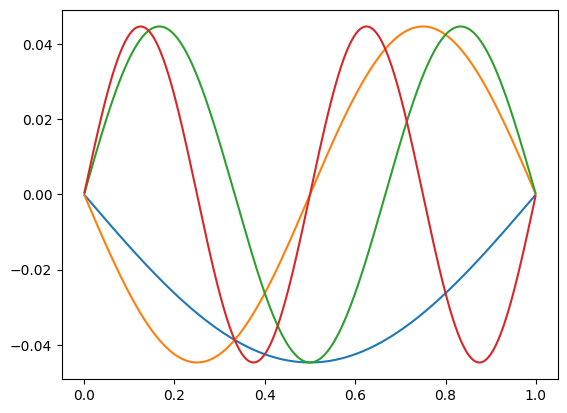

In [57]:
# plot some the 5 eigenvectors related to the 5 smallest eigenvalues
for i in range(1,5):
    plt.plot(x[1:-1],v[:,-i])